## Human Failure Representation

This paper covers the exploration and analysis of error producing conditions by a human operator in the rover model.

In [55]:
import sys, os
sys.path.insert(0,os.path.join('..','..'))

from rover_model_human import Rover, gen_params
from rover_model import plot_map, plot_trajectories
import fmdtools.resultdisp as rd
import fmdtools.faultsim.propagate as prop
from fmdtools.modeldef import SampleApproach, NominalApproach

import numpy as np
import matplotlib.pyplot as plt

In [56]:
prop

<module 'fmdtools.faultsim.propagate' from 'C:\\Users\\dhulse\\Documents\\GitHub\\fmdtools\\example_rover\\HFAC_Analyses\\..\\..\\fmdtools\\faultsim\\propagate.py'>

Visualizing Rover Structure

In [57]:
mdl = Rover()

In [58]:
#%matplotlib qt
#rd.graph.set_pos(mdl, gtype='bipartite')

In [59]:
#%matplotlib inline

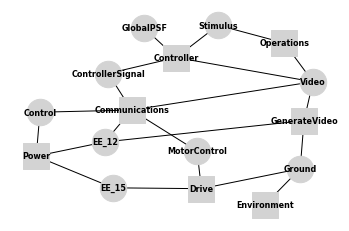

In [60]:
mdl = Rover()
fig, ax = rd.graph.show(mdl, gtype='bipartite')

In [61]:
fig.savefig("rover_structure.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

Visualizing Action Sequence Graph for the Controller

In [62]:
mdl.fxns['Controller'].action_graph

In [63]:
#%matplotlib qt
#rd.graph.set_pos(mdl.fxns['Controller'].flow_graph)

In [64]:
#%matplotlib inline

In [65]:
act_pos={'Press': [0.942, 0.076], 'ComprehendOut': [0.302, 0.452], 'SeeOut': [0.028, 0.732], 
             'Project': [0.499, 0.46], 'PressOut': [0.958, -0.07], 'Reach': [0.797, 0.175], 
             'ProjectOut': [0.482, 0.302], 'ReachOut': [0.806, 0.041], 'Comprehend': [0.317, 0.595], 
             'Look': [0.038, 0.877], 'Decide': [0.667, 0.308], 'DecideOut': [0.652, 0.189], 
             'Signal': [0.721, 0.736], 'Percieve': [0.165, 0.738], 'PercieveOut': [0.102, 0.594], 
             'Video': [0.418, 0.889], 'Stimulus': [0.026, 1.034], 'LocalPSF': [0.717, 0.484], 
             'GlobalPSF': [0.521, 0.836]}

In [66]:
%matplotlib qt
rd.graph.set_pos(mdl.fxns['Controller'].flow_graph, pos=act_pos)

In [67]:
%matplotlib inline

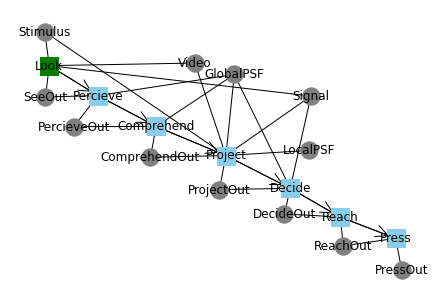

In [68]:
fig = mdl.fxns['Controller'].show_ASG(pos=act_pos, with_cond_labels=False)

In [69]:
fig.savefig("action_graph.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

## Testing behavioral simulation

In [70]:
mdl = Rover()

Execution order

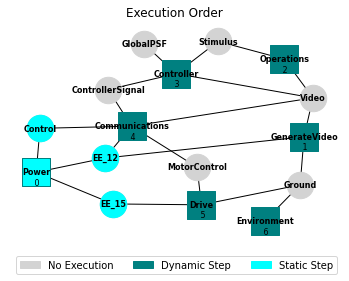

In [71]:
order_fig = rd.graph.exec_order(mdl, gtype='bipartite')

Performance on turn

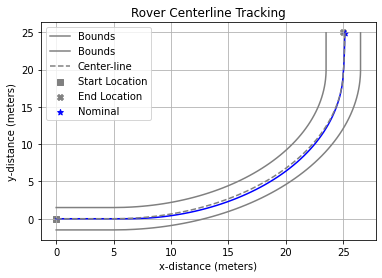

In [78]:
mdl = Rover(params=gen_params('turn', start=5))
endresults, mdlhist = prop.nominal(mdl)
plot_map(mdl, mdlhist)

Performance on sine map

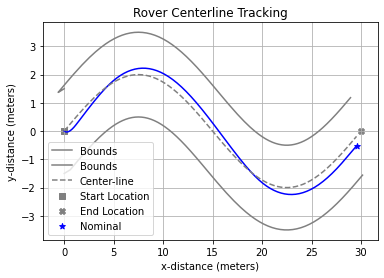

In [79]:
mdl = Rover(params=gen_params('sine', amp=2, wavelength=30))
endresults, mdlhist = prop.nominal(mdl)
plot_map(mdl, mdlhist)

In [80]:
phases, modephases = rd.process.modephases(mdlhist)

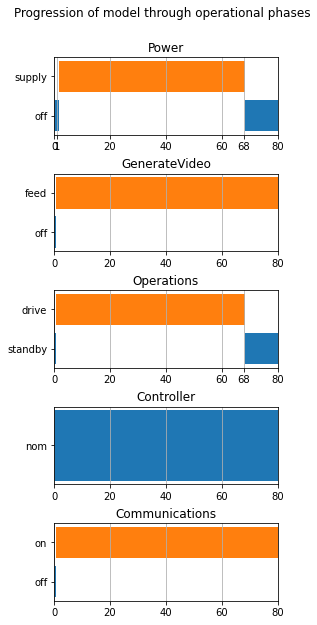

In [81]:
phase_fig = rd.plot.phases(phases, modephases=modephases, title_padding=-0.05, v_padding=0.5)

## Testing Faults

In [82]:
app=SampleApproach(mdl, faults='Controller', phases={'drive':phases['Operations']['drive']})

In [83]:
app.rates

{('Controller', 'stuck_turn'): {('global', 'drive'): 34.0},
 ('Controller', 'stuck_power'): {('global', 'drive'): 34.0},
 ('Controller', 'failed_look'): {('global', 'drive'): 68.0},
 ('Controller', 'perc_failed_S1'): {('global', 'drive'): 9.714285714285714},
 ('Controller', 'perc_failed_Video'): {('global', 'drive'): 9.714285714285714},
 ('Controller',
  'perc_failed_S1_temp'): {('global', 'drive'): 9.714285714285714},
 ('Controller',
  'perc_failed_S2_temp'): {('global', 'drive'): 9.714285714285714},
 ('Controller',
  'perc_failed_noaction'): {('global', 'drive'): 9.714285714285714},
 ('Controller',
  'perc_failed_Video_temp'): {('global', 'drive'): 9.714285714285714},
 ('Controller', 'perc_failed_S2'): {('global', 'drive'): 9.714285714285714},
 ('Controller', 'comp_failed_S1'): {('global', 'drive'): 9.714285714285714},
 ('Controller', 'comp_failed_Video'): {('global', 'drive'): 9.714285714285714},
 ('Controller',
  'comp_failed_S1_temp'): {('global', 'drive'): 9.714285714285714},
 ('

In [84]:
app.times

[35]

In [85]:
endclasses,mdlhists = prop.approach(mdl, app)

SCENARIOS COMPLETE:  17%|██████████▊                                                    | 6/35 [00:00<00:01, 21.54it/s]C:\Users\dhulse\Documents\GitHub\fmdtools\example_rover\HFAC_Analyses\..\..\fmdtools\modeldef.py:801: UserWarning: The screen is already not visible to the operator. All faults removed.
  if warnmessage: self.warn(warnmessage, "All faults removed.")
SCENARIOS COMPLETE:  51%|███████████████████████████████▉                              | 18/35 [00:00<00:00, 20.93it/s]C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\rover_model_human.py:412: UserWarning: The Signal requires a right turn. Fault mode `failed_turnright' removed.
  self.remove_fault('failed_turnright', opermode='nominal', warnmessage='The Signal requires a right turn.')
C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\rover_model_human.py:469: UserWarning: The Signal requires a right turn. Fault mode `failed_turnright' removed.
  self.remove_fault('failed_turnright', opermode='nominal', w

<Figure size 378x252 with 0 Axes>

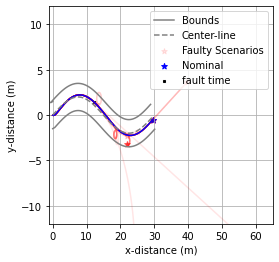

In [86]:
fig = plt.figure(figsize=(5.25,3.5))
fig = plot_trajectories(mdlhists, app=app, faultlabel='Faulty Scenarios', title='', mode_trunc=len('Controller'), mode_trunc_end=4, show_labels=False, xlim=(-1,65), ylim=(-12,12))

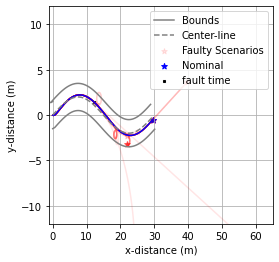

In [87]:
fig

In [88]:
fig.savefig("rover_map.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

Below shows the impact of each fault:

In [89]:
reshists, diffs, summaries = rd.process.hists(mdlhists)
new_fault_tab = rd.tabulate.fullfmea(endclasses, summaries)
new_fault_tab = new_fault_tab.sort_values('end_dist', ascending=False)

new_fault_tab 

,degraded functions,degraded flows,rate,cost,prob,expected cost,at_finish,line_dist,num_modes,end_dist,faults,classification,x,y
"Controller press_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,29.464277,1,29.149863,{'Controller': ['press_failed_noaction']},incomplete mission faulty,55.877858,-13.418307
"Controller stuck_turn, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,14.493558,1,17.393753,{'Controller': ['stuck_turn']},incomplete mission faulty,24.292566,-16.430698
"Controller decide_failed_poweroff, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,0.339437,1,17.212349,{'Controller': ['decide_failed_poweroff']},incomplete mission faulty,12.830739,1.217155
"Controller proj_failed_poweroff, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,0.339437,1,17.212349,"{'Controller': ['decide_failed_poweroff', 'pro...",incomplete mission faulty,12.830739,1.217155
"Controller decide_failed_poweron, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",0,0,1,0,False,10.876464,1,10.390265,{'Controller': ['decide_failed_poweron']},incomplete mission faulty,39.730604,3.643207
"Controller proj_failed_poweron, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",0,0,1,0,False,10.876464,1,10.390265,"{'Controller': ['decide_failed_poweron', 'proj...",incomplete mission faulty,39.730604,3.643207
"Controller stuck_power, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",0,0,1,0,False,10.876464,1,10.390265,{'Controller': ['stuck_power']},incomplete mission faulty,39.730604,3.643207
"Controller comp_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,1.234222,1,8.568927,{'Controller': ['comp_failed_noaction']},incomplete mission faulty,22.055955,-3.212267
"Controller cannot_reach, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,1.234222,1,8.568927,{'Controller': ['cannot_reach']},incomplete mission faulty,22.055955,-3.212267
"Controller decide_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,1.234222,1,8.568927,{'Controller': ['decide_failed_noaction']},incomplete mission faulty,22.055955,-3.212267


In [90]:
fault_tab = new_fault_tab[['degraded functions','degraded flows', 'classification', 'end_dist']]
fault_tab

,degraded functions,degraded flows,classification,end_dist
"Controller press_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,29.149863
"Controller stuck_turn, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,17.393753
"Controller decide_failed_poweroff, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,17.212349
"Controller proj_failed_poweroff, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,17.212349
"Controller decide_failed_poweron, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,10.390265
"Controller proj_failed_poweron, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,10.390265
"Controller stuck_power, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,10.390265
"Controller comp_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,8.568927
"Controller cannot_reach, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,8.568927
"Controller decide_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,8.568927


In [91]:
fault_tab

,degraded functions,degraded flows,classification,end_dist
"Controller press_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,29.149863
"Controller stuck_turn, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,17.393753
"Controller decide_failed_poweroff, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,17.212349
"Controller proj_failed_poweroff, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,17.212349
"Controller decide_failed_poweron, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,10.390265
"Controller proj_failed_poweron, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,10.390265
"Controller stuck_power, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,10.390265
"Controller comp_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,8.568927
"Controller cannot_reach, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,8.568927
"Controller decide_failed_noaction, t=35","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,8.568927


In [92]:
fault_tab = fault_tab[:15]

In [93]:
print(fault_tab.to_latex())

\begin{tabular}{lllll}
\toprule
{} &               degraded functions &                                     degraded flows &             classification &   end\_dist \\
\midrule
Controller press\_failed\_noaction, t=35  &  [Power, Operations, Controller] &  [Ground, EE\_15, Video, MotorControl, Control, ... &  incomplete mission faulty &  29.149863 \\
Controller stuck\_turn, t=35             &  [Power, Operations, Controller] &  [Ground, EE\_15, Video, MotorControl, Control, ... &  incomplete mission faulty &  17.393753 \\
Controller decide\_failed\_poweroff, t=35 &  [Power, Operations, Controller] &  [Ground, EE\_15, Video, MotorControl, Control, ... &  incomplete mission faulty &  17.212349 \\
Controller proj\_failed\_poweroff, t=35   &  [Power, Operations, Controller] &  [Ground, EE\_15, Video, MotorControl, Control, ... &  incomplete mission faulty &  17.212349 \\
Controller decide\_failed\_poweron, t=35  &  [Power, Operations, Controller] &  [Ground, EE\_15, Video, Control, Contro

As shown, most modes now have an effect.

## Examining Performance Shaping Factors

In [94]:
nomapp = NominalApproach()
nomapp.add_param_ranges(gen_params,'PSFs', 'sine', fatigue=(0,11,1),attention=(0,11,1), amp=4)

In [95]:
endresults, mdlhists = prop.nominal_approach(mdl, nomapp)

SCENARIOS COMPLETE: 100%|████████████████████████████████████████████████████████████| 121/121 [00:05<00:00, 21.56it/s]


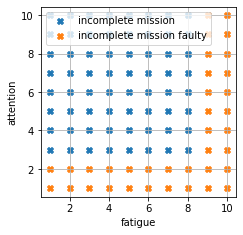

In [96]:

fig = rd.plot.nominal_vals_2d(nomapp, endresults, 'fatigue', 'attention', title="", legendloc="upper left", figsize=(3.5,3.5))

In [97]:
fig.savefig("nominal_psfs.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [104]:
mdl = Rover(params=gen_params('sine', amp=2, fatigue=0, wavelength=30))
endresults, mdlhist = prop.one_fault(mdl, 'Operations', 'no_con', time=15)

In [105]:
endresults['faults']

{'Operations': ['no_con']}

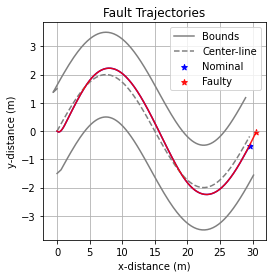

In [106]:
traj_fig = plot_trajectories(mdlhist, faultalpha=0.9)

C:\Users\dhulse\Documents\GitHub\fmdtools\example_rover\HFAC_Analyses\..\..\fmdtools\resultdisp\plot.py:260: UserWarning: Deprecated function. Use resultdisp.plot.mdlhists instead.
  warnings.warn("Deprecated function. Use resultdisp.plot.mdlhists instead.")


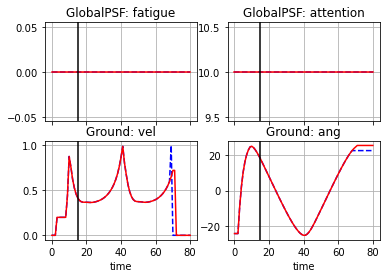

In [107]:
fig = rd.plot.mdlhistvals(mdlhist, time=15, fxnflowvals={'GlobalPSF':['fatigue','attention'], 'Ground':['ang', 'vel']}, legend=False)

In [108]:
mdlhist['nominal'].keys()

dict_keys(['flows', 'functions', 'time'])

In [113]:
faulthists = {}
faulttimes = [j for j in range(0,30,5)]
for j in faulttimes:
    for i in range(10):
        np.random.seed()
        mdl = Rover(params=gen_params('turn', start=10, fatigue=0))
        endresults, mdlhist = prop.one_fault(mdl, 'Operations', 'no_con', time=j)
        faulthists[str(i+j)] = mdlhist['faulty']

C:\Users\dhulse\Documents\GitHub\fmdtools\example_rover\HFAC_Analyses\..\..\fmdtools\modeldef.py:801: UserWarning: The screen is already not visible to the operator. All faults removed.
  if warnmessage: self.warn(warnmessage, "All faults removed.")


<Figure size 324x216 with 0 Axes>

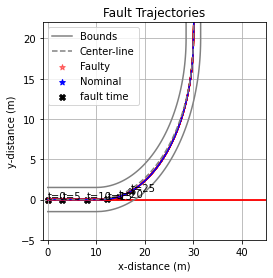

In [114]:
fig = plt.figure(figsize=(4.5,3))
fig = plot_trajectories(faulthists,mdlhist['nominal'], faultalpha=0.5, show_labels=False, xlim=(-1,45), ylim=(-5,22))
for t in faulttimes:
    plt.annotate("t="+str(t), (mdlhist['nominal']['flows']['Ground']['x'][t], mdlhist['nominal']['flows']['Ground']['y'][t]))
plt.scatter(mdlhist['nominal']['flows']['Ground']['x'][faulttimes], mdlhist['nominal']['flows']['Ground']['y'][faulttimes], marker='X', color='black', label='fault time')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [115]:
fig.savefig("nocon_trajectories.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [116]:
plothists = faulthists
plothists['nominal'] = mdlhist['nominal']

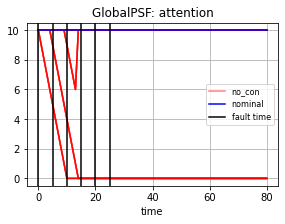

In [117]:
fig, ax = rd.plot.mdlhists(plothists, comp_groups={'no_con':faulthists.keys(),'nominal':['nominal']}, fxnflowvals={'GlobalPSF':['attention']}, cols=1, time_slice=faulttimes, indiv_kwargs={'no_con':{'alpha':0.5, 'color':'red'}, 'nominal':{'color':'blue'}}, time_slice_label='fault time', figsize=(4.5,3),  ylabels={('GlobalPSF','attention'):'attention parameter'})

In [118]:
fig.savefig("nocon_attention.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [122]:
faulthists = {}
faulttimes = [j for j in range(0,30,5)]
for j in faulttimes:
    for i in range(10):
        np.random.seed()
        mdl = Rover(params=gen_params('sine', amp=2, fatigue=0, wavelength=30))
        endresults, mdlhist = prop.one_fault(mdl, 'Operations', 'no_con', time=j)
        faulthists[str(i+j)] = mdlhist['faulty']

<Figure size 324x216 with 0 Axes>

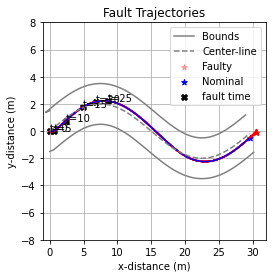

In [124]:
fig = plt.figure(figsize=(4.5,3))
fig = plot_trajectories(faulthists,mdlhist['nominal'], faultalpha=0.3, show_labels=False, xlim=(-1,32), ylim=(-8,8))
for t in faulttimes:
    plt.annotate("t="+str(t), (mdlhist['nominal']['flows']['Ground']['x'][t], mdlhist['nominal']['flows']['Ground']['y'][t]))
plt.scatter(mdlhist['nominal']['flows']['Ground']['x'][faulttimes], mdlhist['nominal']['flows']['Ground']['y'][faulttimes], marker='X', color='black', label='fault time')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [125]:
fig.savefig("nocon_trajectories_sine.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [126]:
plothists = faulthists
plothists['nominal'] = mdlhist['nominal']

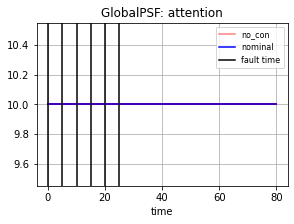

In [127]:
fig, ax = rd.plot.mdlhists(plothists, comp_groups={'no_con':faulthists.keys(),'nominal':['nominal']}, fxnflowvals={'GlobalPSF':['attention']}, cols=1, time_slice=faulttimes, indiv_kwargs={'no_con':{'alpha':0.5, 'color':'red'}, 'nominal':{'color':'blue'}}, time_slice_label='fault time', figsize=(4.5,3), ylabels={('GlobalPSF','attention'):'attention parameter'})

In [128]:
fig.savefig("nocon_attention_sine.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)